# Non-linear fitting

Source: Saupin (2023) p.160;, [Wikipedia (Betz's law)](https://en.wikipedia.org/wiki/Betz%27s_law)

In aerodynamics, Betz's law indicates the maximum power that can be extracted from the wind, independent of the design of a wind turbine in open flow.

According to Betz's law, no wind turbine of any mechanism can capture more than 16/27 (59.3%) of the kinetic energy in wind. The factor 16/27 (0.593) is known as Betz's coefficient.

$$
P^{max} = \frac{16}{27} \cdot \frac{1}{2} \rho S v^3
$$

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Calcul des paramètres par la méthode des moindres carrés.

In [2]:
def fit(X, Y):
    return inv(X.T.dot(X)).dot(X.T).dot(Y)

## Le rayon des pales de l'éolienne est de 50\:m.

In [7]:
R = 50

## La surface qui en découle est $S = S \pi r^2$.

In [8]:
S = 2 * 3.1415 * R**2

## La vitesse du vent est prise entre 0 et 30 $\frac{m}{s}$.

$$
V_3 = \frac{8}{27} S v^3
$$

In [9]:
V = np.linspace(0, 30, 50)
V_3 = 8.0 / 27.0 * S * np.array([[v**3] for v in V])

## Masse volumique de l'air

In [4]:
rho = 1.292

## Calcul de la puissance selon la loi de Betz, en ajoutant du bruit gaussien.

$$
P = \rho * ( V_3 + \epsilon )
$$

In [10]:
P = np.array([ rho * (V_3+np.random.normal())])

## Pour l'exercice, la méthode des moindres carrés est utilisée pour déterminer $\rho$.

In [5]:
rho = fit(V_3, P)
print(rho)
# [[[1.29200001]]]

[[[1.29200002]]]


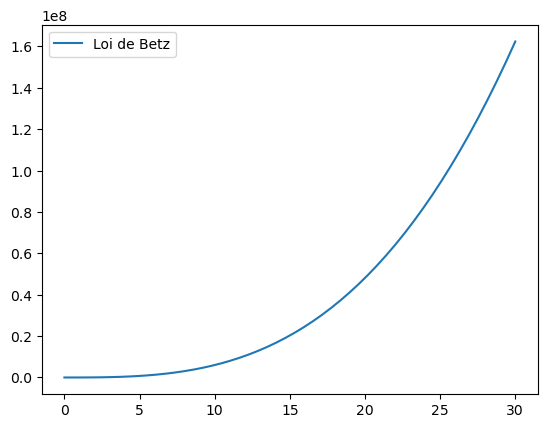

In [6]:
plt.plot(V,
         [p[0] for p in P[0]],
         label='Loi de Betz')
plt.legend()
plt.show()